#Desafio Kaggle - Santander Customer Transaction Prediction

> Desafio em que será necessário prever a variável target do dataset.

* toc: true
/n* branch: master
* badges: false
* comments: false
* author: brn
* categores: [blog]


Para acessar esta competição no Kaggle [clique aqui](https://www.kaggle.com/c/santander-customer-transaction-prediction/overview)

Para baixar os dados [clique aqui](https://www.kaggle.com/c/santander-customer-transaction-prediction/data)

## Proposta do desafio

Nossa equipe de ciência de dados está desafiando continuamente nossos algoritmos de aprendizado de máquina, trabalhando com a comunidade global de dados científicos para garantir que possamos identificar com mais precisão novas maneiras de resolver nosso desafio mais comum, problemas de classificação binária como: um cliente está satisfeito? Um cliente comprará este produto? Um cliente pode pagar este empréstimo?

Neste desafio, convidamos a Kagglers a nos ajudar a identificar quais clientes farão uma transação específica no futuro, independentemente do volume de dinheiro transacionado. Os dados fornecidos para esta competição têm a mesma estrutura que os dados reais que temos disponíveis para resolver este problema.

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

# Métricas e otimização
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import  f1_score

from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Awari/train.csv")
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


Como o dataset foi distribuido de forma a ocultar o que são as variaveis, fica infactivel fazer uma engenharia de features.

In [ ]:
data.shape

(200000, 202)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


## Avaliando o target



In [ ]:
data['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

Importante lembrar que em um problema de classificação caso os dados estejam desbalanceados, que é o caso, é preciso tomar alguma medidas para corrigir isso.

In [ ]:
X = data.drop(columns=['ID_code', 'target'])
y = data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## 1 - Regressão Logistica

In [ ]:
pipe_reglog = make_pipeline(StandardScaler(), LogisticRegression())
pipe_reglog.fit(X_train, y_train)
y_pred = pipe_reglog.predict(X_test)

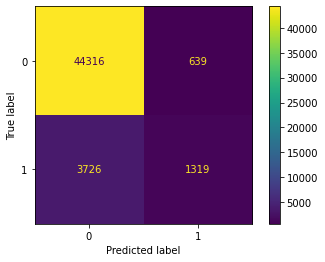

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.6736465781409602
Acuracia 0.9127
Recall 0.26144697720515364
Roc 0.6236163814954696
f1 0.37669570184206774


A acurácia não é uma boa métrica para dados desbalanceados

### Regressão Logistica + Balanceamento

In [ ]:
pipe_reglog = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))
pipe_reglog.fit(X_train, y_train)
y_pred = pipe_reglog.predict(X_test)

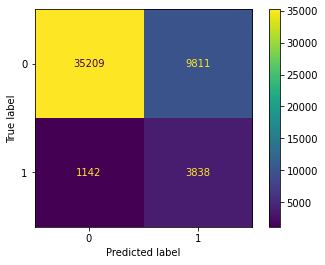

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.28119276137445964
Acuracia 0.78094
Recall 0.7706827309236948
Roc 0.7763786822099593
f1 0.41204573514413007


### Regressão Logistica + Balanceamento + RFE

In [ ]:
pipe_rfe_reglog = make_pipeline(StandardScaler(), RFECV(LogisticRegression(class_weight='balanced'), step=1, cv=5), LogisticRegression(class_weight='balanced') )
pipe_rfe_reglog.fit(X_train, y_train)
y_pred = pipe_rfe_reglog.predict(X_test)

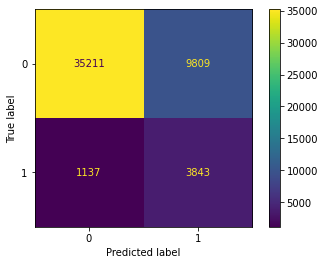

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.2814972165250513
Acuracia 0.78108
Recall 0.7716867469879518
Roc 0.7769029025921546
f1 0.41251610133104333


## 2 - KNeighbors

In [ ]:
for i in range(1, 10):
    pipe_neigh = make_pipeline(KNeighborsClassifier(n_neighbors=i))
    pipe_neigh.fit(X_train, y_train)
    y_pred = pipe_neigh.predict(X_test)
    print(i)
    print('Roc', roc_auc_score(y_test, y_pred))
    print('----------------------------------')

In [ ]:
pipe_neigh = make_pipeline(KNeighborsClassifier(n_neighbors=3))
pipe_neigh.fit(X_train, y_train)
y_pred = pipe_neigh.predict(X_test)

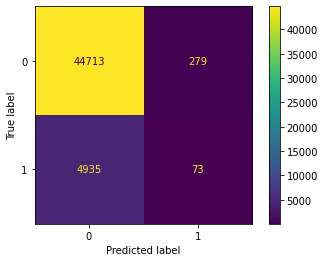

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.20738636363636365
Acuracia 0.89572
Recall 0.01457667731629393
Roc 0.504187787449043
f1 0.027238805970149257


## 3 - SVM/SVC

In [ ]:
pipe_svc = make_pipeline(StandardScaler(), SVC())
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

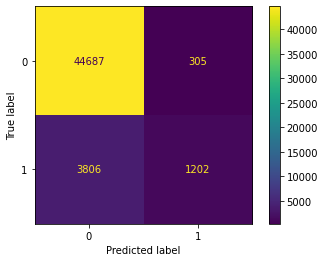

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.7976111479761114
Acuracia 0.91778
Recall 0.24001597444089456
Roc 0.6166184957552979
f1 0.36899462778204145


### SVM/SVC + Balanceamento

In [ ]:
pipe_svc = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

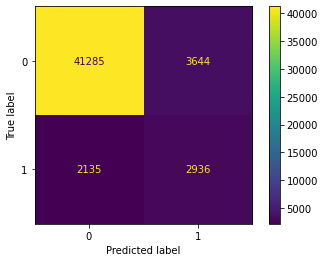

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.4462006079027356
Acuracia 0.88442
Recall 0.5789785052257937
Roc 0.7489363803032528
f1 0.5039910737275771


## 4 - Árvore de Decisão

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

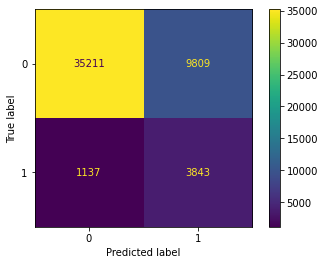

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.2814972165250513
Acuracia 0.78108
Recall 0.7716867469879518
Roc 0.7769029025921546
f1 0.41251610133104333


### Árvore de Decisão + Balanceamento

In [ ]:
tree = DecisionTreeClassifier(class_weight='balanced')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

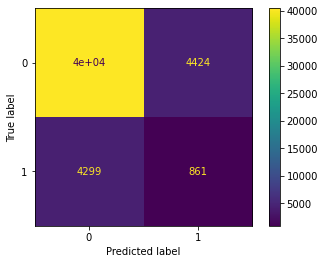

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.1629139072847682
Acuracia 0.82554
Recall 0.16686046511627908
Roc 0.5340992780532332
f1 0.16486357108664434


## 6 - Árvore de Decisão + Otimização de Hiperparametros (ROC)

In [ ]:
from sklearn import metrics

metrics.SCORERS.keys() # Nome dos parametros de socring

In [ ]:
params = {
    #'splitter': ['best', 'random'],
    'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], #3, 4, 5, 6, 7, 8, 9, 
    'min_samples_split': [40, 60, 80, 100]#,2, 10, 20,
    #'class_weight': ['balanced', None]
}
#Por padrão o modelo escolhe a métrica acurácia para escolher os parametros
grid = GridSearchCV(DecisionTreeClassifier(), params, scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20],
                         'min_samples_split': [40, 60, 80, 100]},
             scoring='roc_auc')

Na primeira rodada do grid tivemos {'max_depth': 10, 'min_samples_split': 40} como melhores parametros, então decidi aumentar esses parametros e rodar de novo

In [ ]:
grid.best_params_

{'max_depth': 13, 'min_samples_split': 100}

In [ ]:
modelo = grid.best_estimator_
y_pred = modelo.predict(X_test)

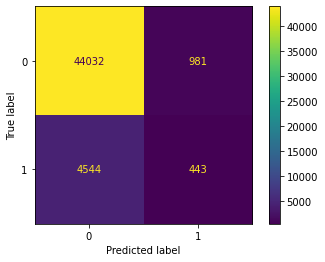

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.31109550561797755
Acuracia 0.8895
Recall 0.08883096049729296
Roc 0.5335186282281191
f1 0.1381999688036188


Melhores parametros {'max_depth': 10, 'min_samples_split': 40}
* Precision 0.3295099061522419
* Acuracia 0.89372
* Recall 0.06336474834569882
* Roc 0.524539993082942
* f1 0.10628994281870163

## 5 - Bagging (Árvore de Decisão)

In [ ]:
bdt = BaggingClassifier(DecisionTreeClassifier(max_depth=13, min_samples_split=100)).fit(X_train, y_train)
y_pred = bdt.predict(X_test)

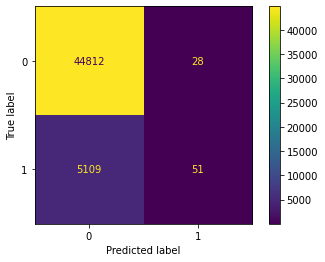

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.6455696202531646
Acuracia 0.89726
Recall 0.009883720930232558
Roc 0.5046296392340726
f1 0.019469364382515744


### Bagging (Árvore de Decisão + Balanceamento)

In [ ]:
bdt = BaggingClassifier(DecisionTreeClassifier(max_depth=13, min_samples_split=100, class_weight='balanced')).fit(X_train, y_train)
y_pred = bdt.predict(X_test)

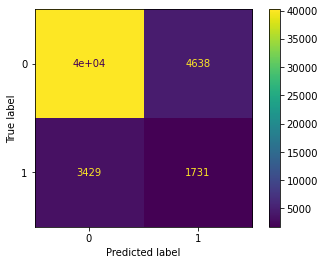

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.2717852096090438
Acuracia 0.83866
Recall 0.3354651162790698
Roc 0.6160153413687945
f1 0.30028623471246424


In [ ]:
bdt = BaggingClassifier(DecisionTreeClassifier(max_depth=13, min_samples_split=100)).fit(X_train, y_train)
y_pred = bdt.predict(X_test)

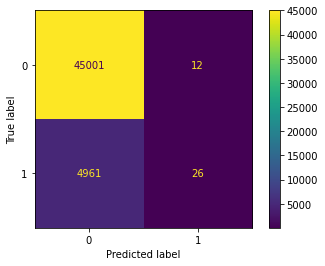

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.6842105263157895
Acuracia 0.90054
Recall 0.005213555243633447
Roc 0.5024734827958776
f1 0.010348258706467661


## 6 - Floresta Randomica

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)

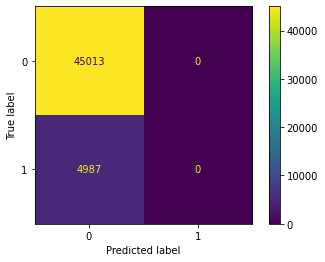

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.0
Acuracia 0.90026
Recall 0.0
Roc 0.5
f1 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Floresta Randomica + Balanceamento

In [ ]:
rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
y_pred = rf.predict(X_test)

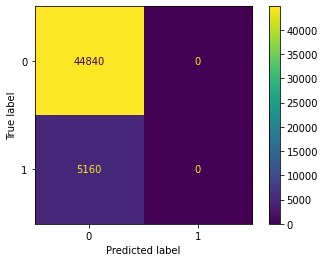

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.0
Acuracia 0.8968
Recall 0.0
Roc 0.5
f1 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 7 - AdaBoost

In [ ]:
ada = AdaBoostClassifier( DecisionTreeClassifier() )
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

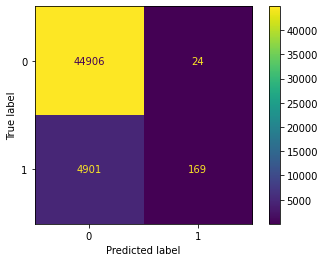

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.8756476683937824
Acuracia 0.9015
Recall 0.03333333333333333
Roc 0.5163995845389124
f1 0.06422192665779973


## 8 - Gradient Boosting

In [ ]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

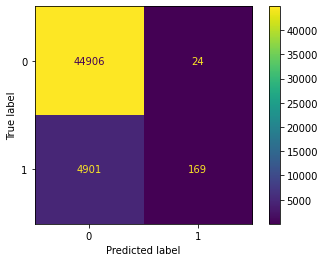

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.8756476683937824
Acuracia 0.9015
Recall 0.03333333333333333
Roc 0.5163995845389124
f1 0.06422192665779973


## 9 - Lightgbm

In [ ]:
light = LGBMClassifier()
light.fit(X_train, y_train)
y_pred = light.predict(X_test)

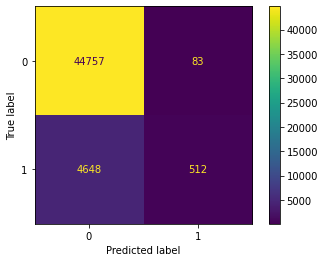

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.8605042016806723
Acuracia 0.90538
Recall 0.09922480620155039
Roc 0.5486868901658957
f1 0.17793223284100781


In [ ]:
light = LGBMClassifier(
        metric = 'auc',
        objective = 'binary',
    )
light.fit(X_train, y_train)
y_pred = light.predict(X_test)

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.8641975308641975
Acuracia 0.9082
Recall 0.0979412352588447
Roc 0.548115005033027
f1 0.17594254937163376


In [ ]:
light = LGBMClassifier(
        metric = 'auc',
        objective = 'binary',
        is_unbalance = True,
        n_jobs = -1, 
        verbose = -1,
        # Parâmetros de https://www.kaggle.com/code/dott1718/922-in-3-minutes/notebook
        learning_rate = 0.05,
        max_bin = 165,
        max_depth = 5,
        min_child_samples = 150,
        min_child_weight = 0.1,
        min_split_gain = 0.0018,
        n_estimators = 41,
        num_leaves = 6,
        reg_alpha = 2.0,
        reg_lambda = 2.54,
    )
light.fit(X_train, y_train)
y_pred = light.predict(X_test)

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.2912285042682172
Acuracia 0.83244
Recall 0.4705176893863682
Roc 0.6715990451509923
f1 0.35977380406541337


In [ ]:
msg = "Terminou de calcular o modelo tudo"

# enviar a mensagem
send_message(token1, id1, msg)

## Minha abordagem

### Adicionando uma nova coluna com clusterização

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [ ]:
data1 = data
data1.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
data1.isna().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [ ]:
data1 = data1.drop(columns=['ID_code'])

In [ ]:
# kmeans precisa que os dados estejam no mesmo range de valores
# pois é um algoritmo baseado em distância.
scaler = StandardScaler()
X = scaler.fit_transform(data1)

In [ ]:
# vamos criar um kmeans, usei 2 clusters a principio
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [ ]:
# será que é bom?
kmeans.inertia_

39955764.096667096

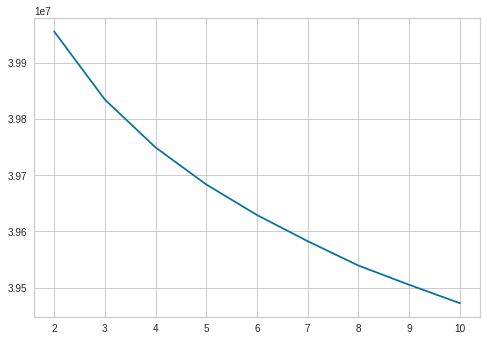

In [ ]:
# testando de 2 até 11 clusters
# aparentemente com 4 clusters tem a meior queda no erro
erro = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    erro.append( kmeans.inertia_ )

plt.plot( range(2,11), erro)

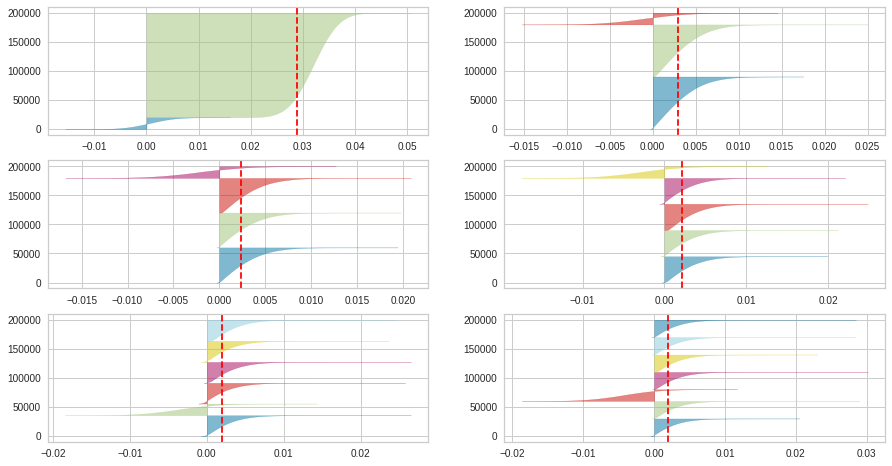

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0) # Primeira tentativa foi com 6
labels = kmeans.fit_predict(X)

In [ ]:
data1['cluster'] = labels

In [ ]:
data1.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,cluster
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,0
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518,1
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965,1
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996,2
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104,2


In [ ]:
X = data1.drop(columns=['target'])
y = data1['target']

### Variando proporção treino/teste


In [ ]:
#Sem clusterização

for i in [0.1, 0.2, 0.25, 0.3, 0.33, 0.5]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=i)
    pipe_rfe_reglog = make_pipeline(StandardScaler(), RFECV(LogisticRegression(class_weight='balanced'), step=1, cv=5), LogisticRegression(class_weight='balanced') )
    pipe_rfe_reglog.fit(X_train, y_train)
    y_pred = pipe_rfe_reglog.predict(X_test)
    print(i)
    print('Roc', roc_auc_score(y_test, y_pred))
    print('--------------------------')

0.1
Roc 0.7739683352912049
--------------------------
0.2
Roc 0.776714549619299
--------------------------
0.25
Roc 0.7768361463903743
--------------------------
0.3
Roc 0.7795311513573233
--------------------------
0.33
Roc 0.7804075834199172
--------------------------
0.5
Roc 0.7797296816518016
--------------------------


In [ ]:
#Com Clusterização (4)
for i in [0.1, 0.2, 0.25, 0.3, 0.33, 0.5]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=i)
    pipe_rfe_reglog = make_pipeline(StandardScaler(), RFECV(LogisticRegression(class_weight='balanced'), step=1, cv=5), LogisticRegression(class_weight='balanced') )
    pipe_rfe_reglog.fit(X_train, y_train)
    y_pred = pipe_rfe_reglog.predict(X_test)
    print(i)
    print('Roc', roc_auc_score(y_test, y_pred))
    print('--------------------------')

0.1
Roc 0.999754058042302
--------------------------
0.2
Roc 0.9996338784476446
--------------------------
0.25
Roc 0.99970703125
--------------------------
0.3
Roc 0.999755859375
--------------------------
0.33
Roc 0.9997779093870299
--------------------------
0.5
Roc 0.9997534030380746
--------------------------


In [ ]:
#COm 6 clusters
for i in [0.1, 0.2, 0.25, 0.3, 0.33, 0.5]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=i)
    pipe_rfe_reglog = make_pipeline(StandardScaler(), RFECV(LogisticRegression(class_weight='balanced'), step=1, cv=5), LogisticRegression(class_weight='balanced') )
    pipe_rfe_reglog.fit(X_train, y_train)
    y_pred = pipe_rfe_reglog.predict(X_test)
    print(i)
    print('Roc', roc_auc_score(y_test, y_pred))
    print('--------------------------')

0.1
Roc 0.999508116084604
--------------------------
0.2
Roc 0.9997559189650964
--------------------------
0.25
Roc 0.9998046875
--------------------------
0.3
Roc 0.999755859375
--------------------------
0.33
Roc 0.9997779093870299
--------------------------
0.5
Roc 0.9997040836456894
--------------------------


### Melhorando Hiperparametros com GridSearch

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe_rfe_reglog = Pipeline(
    [
        ("std", StandardScaler()), 
        ("RFE", RFECV(LogisticRegression(class_weight='balanced'), scoring='roc_auc')),
        ("class", LogisticRegression(class_weight='balanced'))
    ]
)

In [ ]:
params = {
    'RFE__step' : [1, 2, 3, 4, 5],
    'RFE__cv' : [3, 4, 5, 6, 7],
    'RFE__min_features_to_select': [1, 2, 3],
    'class__multi_class': ['auto', 'ovr', 'multinomial']
}

grid = GridSearchCV(pipe_rfe_reglog, 
                    params, 
                    #cv = 20, 
                    scoring = 'roc_auc')

In [ ]:
grid.best_params_

AttributeError: ignored

In [ ]:
modelo = grid.best_estimator_
y_pred = modelo.predict(X_test)

AttributeError: ignored

In [ ]:
pd.DataFrame(grid.cv_results_)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

In [ ]:
msg = "Terminou de calcular o modelo"

# enviar a mensagem
send_message(token1, id1, msg)

## Abordagem vencedora do desafio

### Interpretação do modelo SHAP
